In [260]:
import pandas as pd
from pandas import Series,DataFrame
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook
pd.set_option('future.no_silent_downcasting',True)

In [261]:
#Read xlsx sheet and carry out some basic filtering / clean up
def load_spreadsheet(sheet_name):
    df = pd.read_excel('Cancer/cancer-historical-summary-1948-2020.xlsx', sheet_name, skiprows=[0,1,2,4])
    df.dropna(subset='Brain (C71)', inplace=True)
    #have found it necessary to create the 'Year' column a second time, as for some reason when dropping unnamed columns it would set all 'Year' values to NAN 
    #if I took approach of simply renaming 'Unnamed: 0' to 'Year'
    df.insert(loc=0, column='Year', value=df['Unnamed: 0'])
    df.drop(df.filter(regex='Unnamed').columns, axis=1, inplace=True)
    df = df.fillna(0) 
    return df

In [262]:
sheets_to_load = {'Regs_Total':None,'Deaths_Total':None,'Regs_Male':None,'Regs_Female':None,'Deaths_Male':None,'Deaths_Female':None}

In [263]:
dfd = {}
for name in sheets_to_load:
    dfd[name] = pd.DataFrame(load_spreadsheet(name))
df_pop = pd.read_csv('Cancer/nzpopulation.csv')

In [264]:
for sheet in sheets_to_load:
    globals()[sheet] = dfd[sheet]

In [265]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
DeathsT         DataFrame        Year All cancers (C00<...>\n\n[66 rows x 2 columns]
Deaths_Female   DataFrame        Year All cancers (C00<...>n\n[66 rows x 23 columns]
Deaths_Male     DataFrame        Year All cancers (C00<...>n\n[66 rows x 20 columns]
Deaths_Total    DataFrame        Year All cancers (C00<...>n\n[66 rows x 18 columns]
RegsT           DataFrame        Year  All cancers (C0<...>\n\n[73 rows x 2 columns]
Regs_Female     DataFrame        Year  All cancers (C0<...>n\n[73 rows x 23 columns]
Regs_Male       DataFrame        Year  All cancers (C0<...>n\n[73 rows x 20 columns]
Regs_Total      DataFrame        Year  All cancers (C0<...>n\n[73 rows x 18 columns]
all_cancers     DataFrame        All cancers (C00–C96,<...>\n\n[1 rows x 34 columns]
compdf          DataFrame                             <...>       6700          3219
compdf2         DataFrame        Year  Regs_Total  Dea<...>03065  \n70  

In [266]:
Regs_Total.head()

,Year,"All cancers (C00–C96, D45–D47)","Lip, Oral Cavity and Pharynx (C00–C14)",Oesophagus (C15),Stomach (C16),Colorectum and anus (C18–C21),Liver and intrahepatic bile ducts (C22),Pancreas (C25),Lung & Trachea (C33–C34),Melanoma (C43),"Kidney and other urinary (C64–C66, C68)",Bladder (C67),Brain (C71),Thyroid (C73),Hodgkin lymphoma (C81),"Non-Hodgkin lymphoma (C82–C86, C96)",Myeloma (C90),Leukaemia (C91–C95)
0,1948,3474.0,251.0,53.0,305.0,448.0,39.0,74.0,156.0,51.0,44.0,75.0,43.0,16.0,23.0,66.0,12.0,97.0
1,1949,3675.0,233.0,51.0,321.0,401.0,38.0,93.0,153.0,37.0,41.0,84.0,56.0,18.0,32.0,77.0,8.0,83.0
2,1950,3605.0,224.0,46.0,352.0,409.0,50.0,95.0,175.0,39.0,43.0,79.0,56.0,19.0,44.0,71.0,9.0,97.0
3,1951,3787.0,204.0,59.0,294.0,439.0,43.0,108.0,201.0,66.0,72.0,77.0,65.0,17.0,31.0,105.0,13.0,90.0
4,1952,3968.0,242.0,75.0,319.0,469.0,58.0,86.0,231.0,64.0,61.0,74.0,69.0,25.0,31.0,82.0,16.0,81.0


In [267]:
Deaths_Total.head()

,Year,"All cancers (C00–C96, D45–D47)","Lip, Oral Cavity and Pharynx (C00–C14)",Oesophagus (C15),Stomach (C16),Colorectum and anus (C18–C21),Liver and intrahepatic bile ducts (C22),Pancreas (C25),Lung & Trachea (C33–C34),Melanoma (C43),"Kidney and other urinary (C64–C66, C68)",Bladder (C67),Brain (C71),Thyroid (C73),Hodgkin lymphoma (C81),"Non-Hodgkin lymphoma (C82–C86, C96)",Myeloma (C90),Leukaemia (C91–C95)
7,1955,3171,56,79,450,527,81,143,340,39,67,70,88,20,32,63,32,144
8,1956,3155,73,69,442,507,76,146,374,39,63,77,83,15,37,75,30,137
9,1957,3213,64,67,415,539,89,144,403,37,68,76,90,10,18,88,34,149
10,1958,3297,75,73,446,539,78,155,399,38,59,88,102,16,29,81,35,147
11,1959,3339,61,67,404,518,83,146,423,47,70,97,84,16,35,86,40,165


In [268]:
def Sum_of_Period(df,min_year,max_year):
    df = df[(df['Year'] > min_year) & (df['Year'] <= max_year)]
    df = df.drop('Year', axis = 1)
    df = df.astype(int)
    df = df.sum()
    return df

In [269]:
def Join_Comp_Sum(d1,d2,col1,col2,min_year,max_year):
    df1 = pd.DataFrame(Sum_of_Period(d1,min_year,max_year))
    df1 = df1.rename(columns={0: col1})
    df2 = pd.DataFrame(Sum_of_Period(d2,min_year,max_year))
    df1[col2] = df2[0]
    return df1

In [270]:
def Select_Period(df,min_year,max_year):
    df = df[(df['Year'] > min_year) & (df['Year'] <= max_year)]
    df = df.astype(int)
    return df

In [271]:
def Join_Comp(d1,d2,col1,col2,min_year,max_year):
    df1 = pd.DataFrame(Select_Period(d1,min_year,max_year))
    df1 = df1.rename(columns={df1.columns[1]: col1})
    df2 = Select_Period(d2,min_year,max_year)
    df2 = df2.rename(columns={df2.columns[1]: col2})
    df2 = df2.drop('Year', axis = 1)
    df1 = pd.concat([df1, df2], axis=1)
    return df1

In [272]:
min_year = 2008
max_year = 2018
c1 = 'Regs_Total'
c2 = 'Deaths_Total'
compdf = Join_Comp_Sum(Regs_Total,Deaths_Total,c1,c2,min_year,max_year)
compdf = compdf.drop(index='All cancers (C00–C96, D45–D47)')

In [273]:
compdf.head()

,Regs_Total,Deaths_Total
"Lip, Oral Cavity and Pharynx (C00–C14)",4646,1354
Oesophagus (C15),2886,2413
Stomach (C16),3902,2790
Colorectum and anus (C18–C21),31085,12486
Liver and intrahepatic bile ducts (C22),3304,2514


Text(0.5, 0.98, 'Cancer Registrations vs Deaths for 2008 - 2018')

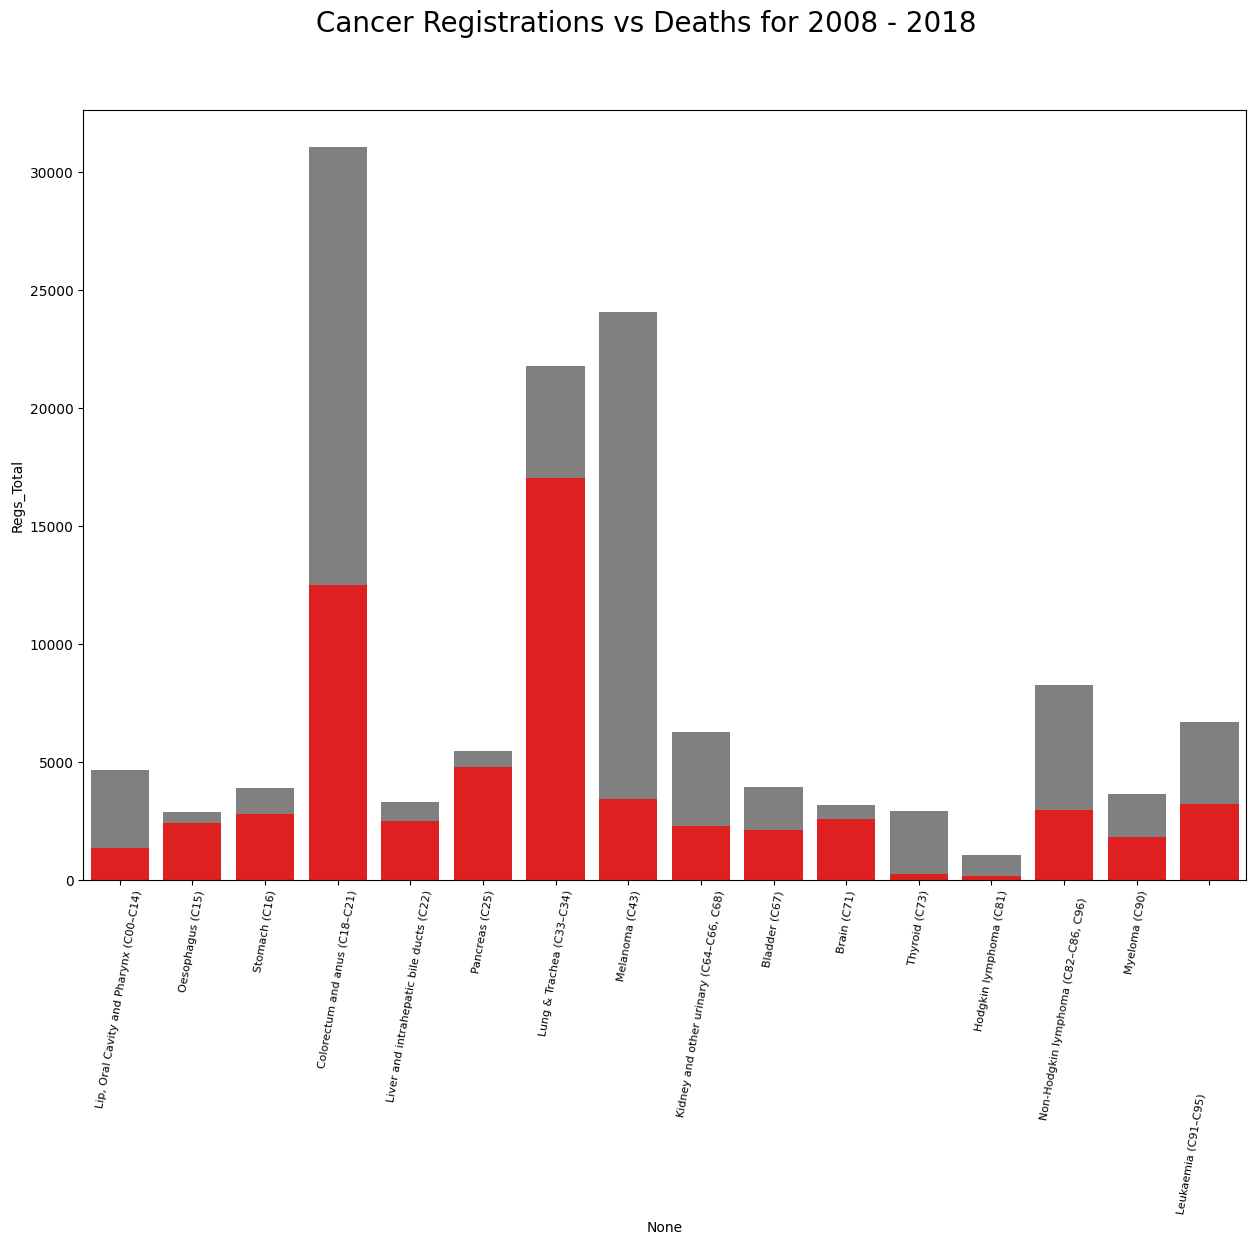

In [274]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=80,fontsize=8)
sns.barplot(data=compdf,x=compdf.index,y='Regs_Total',errorbar=None, color = 'grey')
sns.barplot(data=compdf,x=compdf.index,y='Deaths_Total',errorbar=None, color = 'red')
fig.suptitle('Cancer Registrations vs Deaths for 2008 - 2018', fontsize = 20)

In [275]:
min_year = 1960
max_year = 2018
c1 = 'Regs_Total'
c2 = 'Deaths_Total'
RegsT = Regs_Total.loc[:, ['Year', 'All cancers (C00–C96, D45–D47)']] 
DeathsT = Deaths_Total.loc[:, ['Year', 'All cancers (C00–C96, D45–D47)']] 
compdf2 = Join_Comp(RegsT,DeathsT,c1,c2,min_year,max_year)
compdf2 = compdf2.rename(columns={1: 'Registrations', 2: 'Deaths'})
#adding NZ population figures to df to allow for check
df_pop_filt = df_pop[(df_pop['year'] > min_year) & (df_pop['year'] <= max_year)]
df_pop_filt = df_pop_filt.drop(['year','male : female ratio', 'male', 'female'], axis=1) 
compdf2 = pd.concat([compdf2, df_pop_filt], axis=1)
compdf2['Death_Rate'] = compdf2['Deaths_Total'] / compdf2['Regs_Total'] * 100
compdf2['Regs:Pop'] = compdf2['Regs_Total'] / compdf2['population'] * 100
compdf2['Deaths:Pop'] = compdf2['Deaths_Total'] / compdf2['population'] * 100
compdf2.head()


,Year,Regs_Total,Deaths_Total,population,Death_Rate,Regs:Pop,Deaths:Pop
13,1961,4432,3541,2431617,79.896209,0.182266,0.145623
14,1962,4546,3597,2486311,79.124505,0.182841,0.144672
15,1963,4760,3752,2540026,78.823529,0.187400,0.147715
16,1964,4887,3674,2590648,75.179046,0.188640,0.141818
17,1965,5140,3817,2638316,74.260700,0.194821,0.144676


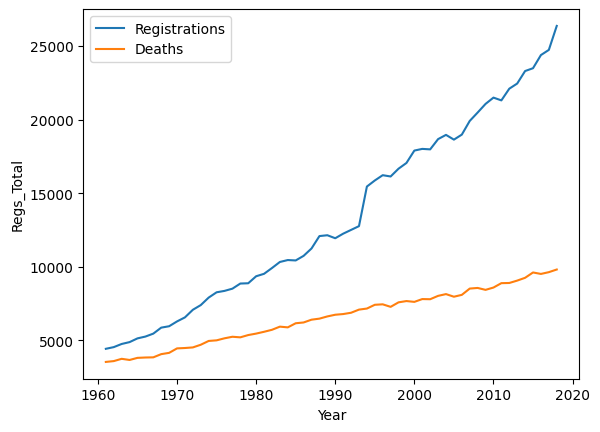

In [276]:
sns.lineplot(data=compdf2, x='Year', y='Regs_Total', label='Registrations')
sns.lineplot(data=compdf2, x='Year', y='Deaths_Total', label='Deaths')
plt.legend()
plt.show()


<Axes: xlabel='Year', ylabel='Death_Rate'>

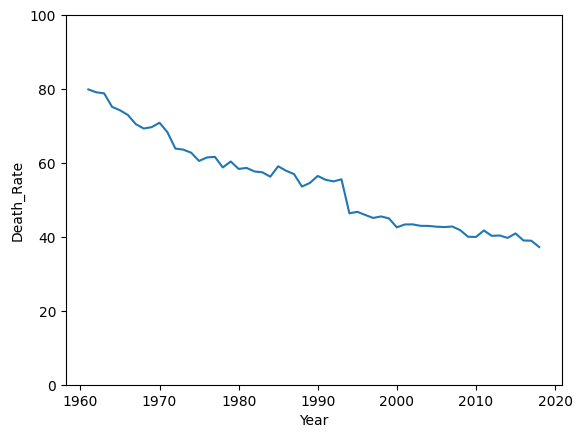

In [277]:
plt.ylim(0, 100)
sns.lineplot(data=compdf2, x='Year', y='Death_Rate')

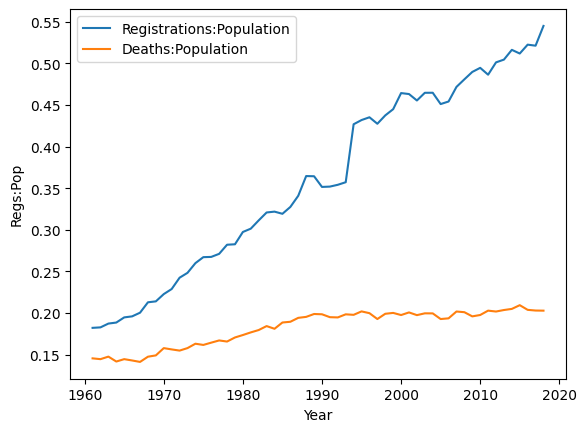

In [280]:
sns.lineplot(data=compdf2, x='Year', y='Regs:Pop', label='Registrations:Population')
sns.lineplot(data=compdf2, x='Year', y='Deaths:Pop', label='Deaths:Population')
plt.legend()
plt.show()